In [ ]:
#0. 필요한 라이브러리 가져옴
import numpy as np  # numpy 라이브러리 불러오기, numpy를 np로 줄여 사용
import matplotlib.pyplot as plt # 데이터를 이미지화하는 라이브러리
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models # 모델을 만들 때 keras sequential API 사용

In [ ]:
#0. 데이터 로드
cifar10 = datasets.cifar10 # cifar10 에 데이터셋 cifar10 대입
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data() # cifar-10 데이터셋 다운로드

170500096/170498071 [==============================] - 12s 0us/step


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] # 클래스 10개의 이름을 각각 지정

#1. 데이터 구조 파악

# 학습할 이미지 데이터셋과 라벨 형태 출력
print("Train samples:", train_images.shape, train_labels.shape)
print("Test samples:", test_images.shape, test_labels.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [ ]:
# numpy 라이브러리 reshape 함수를 이용하여 적절한 형태의 배열로 변환
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3)) 

In [ ]:
#2. 데이터 전처리

# numpy 라이브러리 reshape 함수를 이용하여 적절한 형태의 배열로 변환
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3)) 

# 픽셀값을 0과 1사이의 값으로 정규화 (RGB는 각각 0부터 255까지의 숫자를 가질 수 있음)
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
#3. CNN  Layer 구성

# 선형으로 계층을 쌓는 모델 만들기
model = models.Sequential()

# Convolution layer 추가
# 인수: 합성곱 필터수: 32, 필터 모양: 3 x 3, 행의 수(32) x 열의 수(32) x 채널 수(RGB이므로 3) 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Max Pooling layer 추가 (2 x 2의 형태의 풀 사이즈로 max polling 하기)
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 2차원 데이터를 1차원으로 바꿔주는 계층 추가
model.add(layers.Flatten())

# dense:이전층과 다음층을 완전연결 - 다음 뉴런을 64개로 설정, 활성화함수로 relu 사용
model.add(layers.Dense(64, activation='relu'))
# 출력 뉴런: 10개, 활성화함수를 softmax
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#optimizer(모델을 업데이트 하는 방법)는 adam을 이용
#loss function(훈련하는 동안 모델의 오차 측정)은 sparse_categorical_crossentropy를 이용
#metrics(훈련 단계와 테스트 단계를 모니터링 함)는 올바르게 분류된 이미지의 비율인 정확도를 사용


# 모델 훈련 단계로 모델이 이미지와 라벨을 매핑하는 방법을 학습, epochs(전체 데이터 학습 반복 횟수)는 10번으로 설정
model.fit(train_images, train_labels, epochs=10) 
#테스트 데이터로 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
# 정확도 출력
print('Test accuracy:', test_acc)

Epoch 1/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.5413 - accuracy: 0.4332
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1638 - accuracy: 0.5864
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0135 - accuracy: 0.6423
Epoch 4/10
1563/1563 [==============================] - 70s 44ms/step - loss: 0.9150 - accuracy: 0.6789
Epoch 5/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8479 - accuracy: 0.7028
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7926 - accuracy: 0.7229
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7487 - accuracy: 0.7382
Epoch 8/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7091 - accuracy: 0.7515
Epoch 9/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6740 - accuracy: 0.7652
Epoch 10/10
313/313 [==============================] - 4s 14ms/s

In [ ]:
predictions = model.predict(test_images) # 훈련된 모델을 사용하여 이미지에 대한 예측 만들기

In [ ]:
#image에 관한 정보들을 출력하는 함수들

# 그림 정보 함수
def plot_image(i, predictions_array, true_label, img): # plot_image 함수 정의
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i] # 예측할 배열의 데이터와 라벨과 이미지를 변수에 대입
  plt.grid(False) 
  plt.xticks([]) 
  plt.yticks([])
 
  plt.imshow(img, cmap=plt.cm.binary, interpolation="bicubic") 
  # 그림을 그리고 2가지 색상을 이용하여 맵을 그림, 픽셀을 흐릿하게 만들어줌
 
  predicted_label = np.argmax(predictions_array) # 예측 모델의 라벨을 배열 값의 최대값을 대입함
  if predicted_label == true_label: # 만약 예측한 라벨이 맞는 라벨이라면 실행
    color = 'blue' # color에 blue를 대입 (파란색으로 색을 지정)
  else: # if문의 조건에 맞지 않는다면 실행
    color = 'red' # color에 red를 대입 (빨간색으로 색을 지정)
 
 # 예측 그림의 x축 정보
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)

# 예측값 및 정답 정보 함수
def plot_value_array(i, predictions_array, true_label): # plot_value_array 함수 정의
  predictions_array, true_label = predictions_array[i], true_label[i] # 예측할 배열의 데이터와 라벨과 이미지를 변수에 대입
  plt.grid(False) 
  plt.xticks([]) 
  plt.yticks([]) 
  thisplot = plt.bar(range(10), predictions_array, color="#777777") # 그래프 막대를 10번 반복해서 예측 배열의 확률을 회색으로 그림
  plt.ylim([0, 1]) # 그래프 범위를 y축은 최소값을 0으로, 최대값을 1로 지정한다.
  predicted_label = np.argmax(predictions_array) # 예측 모델의 라벨을 배열 값의 최대값을 대입함
 
  thisplot[predicted_label].set_color('red') # 예측 최대값을 빨간색으로 지정
  thisplot[true_label[0]].set_color('blue') # 올바른 예측 라벨은 파란색으로 지정

# 출력 함수
def predict_img(i,j): #parameter: 이미지 개수
  for x in range(i,j):
    plt.figure(figsize=(6,3)) # 그림과 그래프 크기 지정 
    plt.subplot(1,2,1) # 1개의 행과 2개의 열로 구성한다.
    plot_image(x, predictions, test_labels, test_images) # plot_image 함수 실행
    plt.subplot(1,2,2) # 1개의 행과 2개의 열로 구성한다.
    plot_value_array(x, predictions,  test_labels) # plot_value_array 함수 실행
    plt.show() # 그림 출력

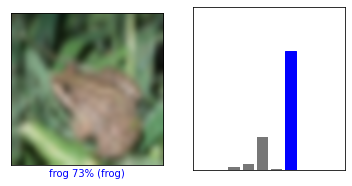

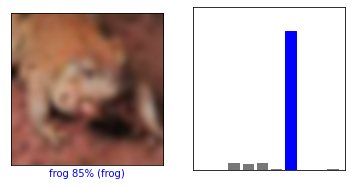

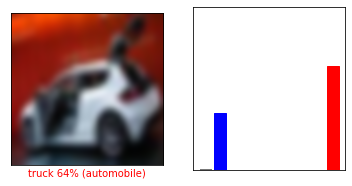

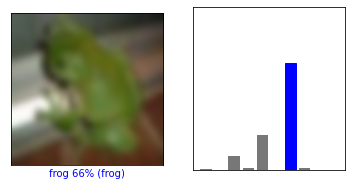

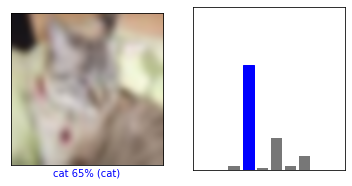

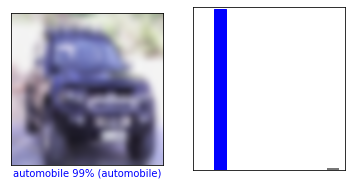

In [ ]:
#이미지 분류 예측 (실행할 때마다 약간의 변동이 생길 수 있음)
predict_img(4,10)